# Elementary Data Analysis of 2019 College Football Passing Statistics

#### John Ajit

### About the Data

For this assignment, I have taken data from sports-reference.com, a site which uses hosts a variety of different datasets for various sports such as football, basketball, and baseball, both professional and collegiate. For the data that I have chosen, more specifically, the data focuses on a quarterback's passing metrics, Passing Yards, Interceptions, Yards Per Attempt, and more. My hope in the analysis of this dataset is to find out more about a quarterback's performance overall, how they perform relative to their peers and which conference has some of the best quarterbacks. I also was interested in seeeing how a team's defense against the passing game would relate to team success. Ultimately, I hope to see how passing overall, whether it be offensive or defensive, relates to team success.


### Importing Libraries and Loading the Data

To help in analysis, I imported pandas and numpy to help in data manipulation and matplotlib for visualizing the data using scatter plots.  

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid")


Below, we are reading in our dataset and ensuring that it is outputting correctly, while also being properly formatted 

In [2]:
df = pd.read_csv("DataSets/2019 Passing Leaders CFB.csv")

In [3]:
df.columns = df.iloc[0]
df = df[1:]
df.head()



,Rk,Player,School,Conf,G,Cmp,Att,Pct,Yds,Y/A,AY/A,TD,Int,Rate,Att,Yds,Avg,TD
1,1,Jalen Hurts*,Oklahoma,Big 12,14,237,340,69.7,3851,11.3,12.2,32,8,191.2,233,1298,5.6,20
2,2,Joe Burrow*,LSU,SEC,15,402,527,76.3,5671,10.8,12.5,60,6,202,115,368,3.2,5
3,3,Tyler Huntley*,Utah,Pac-12,14,220,301,73.1,3092,10.3,10.9,19,4,177.6,104,290,2.8,5
4,4,Tanner Morgan*,Minnesota,Big Ten,13,210,318,66,3253,10.2,11.1,30,7,178.7,61,-57,-0.9,1
5,5,Trey Lance,North Dakota State,MVC,16,192,287,66.9,2786,9.7,11.7,28,0,180.6,169,1100,6.5,14


As it can be seen above, there are a couple columns that have repeating column names such as "Passing Yards" and "Rushing Yards" both just being identified as "Yds". Below, I changed the column names of each of the redundant column names, so passing and rushing could be diffrentiated. 

In [4]:
df = df.rename(columns={df.columns[8]: 'PYds', df.columns[15]: 'RYds'})
df.columns.values[8] = "PYds"
df.columns.values[6] = "PAtt"
df.columns.values[11] = "PTD"
df.columns.values[13] = "QBR"
df.columns.values[14] = "RAtt"
df.columns.values[17] = "RTD"




df.head()


,Rk,Player,School,Conf,G,Cmp,PAtt,Pct,PYds,Y/A,AY/A,PTD,Int,QBR,RAtt,RYds,Avg,RTD
1,1,Jalen Hurts*,Oklahoma,Big 12,14,237,340,69.7,3851,11.3,12.2,32,8,191.2,233,1298,5.6,20
2,2,Joe Burrow*,LSU,SEC,15,402,527,76.3,5671,10.8,12.5,60,6,202,115,368,3.2,5
3,3,Tyler Huntley*,Utah,Pac-12,14,220,301,73.1,3092,10.3,10.9,19,4,177.6,104,290,2.8,5
4,4,Tanner Morgan*,Minnesota,Big Ten,13,210,318,66,3253,10.2,11.1,30,7,178.7,61,-57,-0.9,1
5,5,Trey Lance,North Dakota State,MVC,16,192,287,66.9,2786,9.7,11.7,28,0,180.6,169,1100,6.5,14


### Changing the Data Types

As I was attempting to apply calculations and descriptive statistics, I quickly ran into many TypeErrors due to all of the columns having an ObjectType and therefore not being able for analysis quite yet. I used the 'astype' method in pandas to achieve this, specifying which data type I wanted each column to be. 

In [5]:
#Checking each data type is a float, string or integer.
#Changing the data types of each column
converting_data_types = {"Rk": int,
                         "G" : int,
                         "Cmp" : int, 
                         "PAtt" : int,
                         "Pct" : float,
                         "PYds" : int,
                         "Y/A" : float,
                         "AY/A" : float,
                         "PTD" : int,
                         "Int" : int,
                         "QBR" : float,
                         "RAtt" : int,
                         "RYds" : int,
                         "Avg" : float,
                         "RTD" : int  
}
df = df.astype(converting_data_types)
#Changing the data types of Players, Schools they go to, and the Conferences they're in, to a string. 
df["Player"] = df["Player"].astype("string")
df["School"] = df["School"].astype("string")
df["Conf"] = df["Conf"].astype("string")
#Checking if the above changes worked
df.dtypes


0
Rk          int32
Player     string
School     string
Conf       string
G           int32
Cmp         int32
PAtt        int32
Pct       float64
PYds        int32
Y/A       float64
AY/A      float64
PTD         int32
Int         int32
QBR       float64
RAtt        int32
RYds        int32
Avg       float64
RTD         int32
dtype: object

As part of my analysis, I wanted to understand a bit more about my data, using some pandas functions that could help. 

In [6]:
print(f'Average of Passing Yds:{df["PYds"].mean().round(2)}')
print(f'Average of QBR:{df["QBR"].mean().round(2)}')
print(f'Average of Passing TDs:{df["PTD"].mean().round(2)}')

Average of Passing Yds:2745.51
Average of QBR:140.3
Average of Passing TDs:20.43


Next, I wanted to visualize where each quarterback would be positioned with their QBR and passing yards taken into account. QBR (or quarterback rating) is a rating made by statisticians which accounts for a variety of passing metrics to provide a rating for quarterback performance.    When I had looked into the dataset, there were some quarterbacks who were not ranked as high, but still had relatively high quarterback ratings.

Text(0, 0.5, 'Passing Yards -Total-')

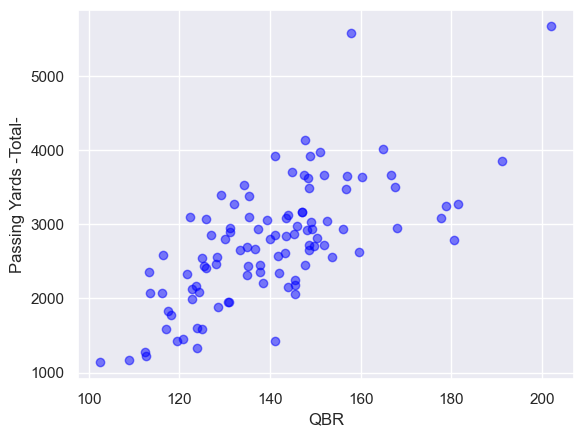

In [7]:
plt.figure()
scatter_passing = plt.scatter(df["QBR"], df["PYds"], color = "blue", alpha = 0.5, label = "Passing Yards")
plt.xlabel("QBR")
plt.ylabel("Passing Yards -Total-")

#### Percentiles

Next, to find the percentiles each quarterback falls into, I used the quantile function of pandas to see how where each quarterback would fall. The percentiles were only calculated for passsing yards. 

In [8]:
median_of_pyds = df["PYds"].quantile(0.5)
quarter_of_pyds = df["PYds"].quantile(0.25)
threequarters_of_pyds = df["PYds"].quantile(0.75)

The graph below, with the percentile lines.

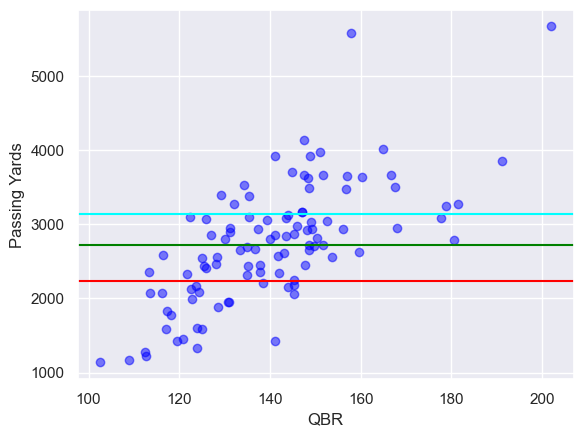

In [9]:
scatter_passing
scatter_passing = plt.scatter(df["QBR"], df["PYds"], color = "blue", alpha = 0.5, label = "Passing Yards")
plt.axhline(y=median_of_pyds, color = "green", label = "50th percentile")
plt.axhline(y=quarter_of_pyds, color = "red", label = "25th percentile")
plt.axhline(y=threequarters_of_pyds, color = "cyan", label = "75th percentile")
plt.xlabel("QBR")
plt.ylabel("Passing Yards")
plt.show()

Based on the results of the graph above, we can see that most quarterbacks fall between the 25th and 75th percentile with still a decent amount of quarterbacks falling below that line, possibly due to injury, not as many games played or other reasons. A major outlier would be the quarterback in the very top right graph. This quarterback is Joe Burrow, who would later go on to win the Heisman Trophy, the most prestigous award in college football, due to his accolades. 

#### Grouping by Conference

I wanted to group it by conference to see how different quarterbacks performed in their respective conferences and if there were more quarterbacks in one conference that made the top 100 quarterbacks for passing. I used the group by function in pandas to achieve this. 

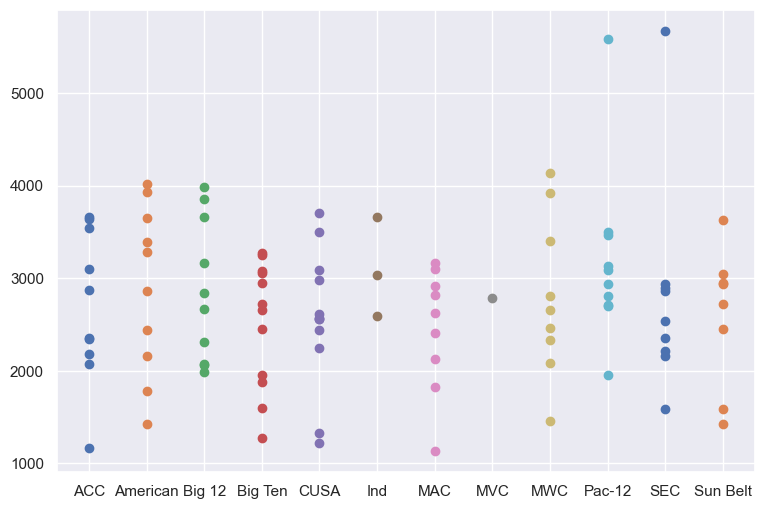

In [10]:
conference_grouping = df.groupby("Conf")
#Changing fig size so the x labels can be seen clearly
plt.figure(figsize=(9,6))
#Check this one
#Organizing it by conference, having conferencename be the x-axis, while the group_dat being each of the
#data points for the passing yards for the respective conferences
for conferencename, group_dat in conference_grouping:
    plt.scatter(group_dat.Conf, group_dat["PYds"], label=conferencename)

plt.show()


Looking at the graph it seems as though the SEC has the most quarterbacks that have made this list but I wanted to use the pandas function mode to check. 

In [11]:
most_common_conf = df["Conf"].mode()[0]
sec_most_common = df["Conf"].mode()[1]
print(most_common_conf)
print(sec_most_common)

Big Ten
CUSA


Unfortunately, I was incorrect and it seems as though the Big Ten quarterbacks appear the most on this list, instead of SEC quarterbacks. 

Looking at this data, we can understand that although the CUSA for example is not popularized to be as competitive as other conferences, it still contains talented players who make the top 100 passing compared to other conferences. 

### Calculating Passer Efficiency Differential

Next, I wanted to visualize how well a school performs overall, taking into account a quarterback's QBR while also looking at a team's defensive side. Using the same calculation used for passer rating, a team's *defensive* passer rating can be calculated in how they hold the opposing team's quarterback to the same stats calculated. For example, on the defensive side, in the dataset, passing yards would represent how many passing yards on average, a defense would hold opposing team to. 

#### Loading in the Defensive Dataset

In [12]:
defense_dataset = pd.read_csv("DataSets/Defense Pass Ratings 2019.csv")

Below, I'm checking if the data has loaded in correctly. 

In [13]:
defense_dataset.columns = defense_dataset.iloc[0]
defense_dataset = defense_dataset[1:]

defense_dataset.head()

,Rk,School,G,Pts,Cmp,Att,Pct,Yds,TD,Att,...,Avg,Pass,Rush,Pen,Tot,No.,Yds,Fum,Int,TO
1,1,Georgia,14,12.6,20.4,35.8,56.9,201.1,1.1,28.4,...,4.3,9.1,4.9,1.9,15.8,6.7,50.9,0.6,0.6,1.1
2,2,San Diego State,13,12.7,20.4,34.5,59.2,212.3,0.8,27.3,...,4.7,8.8,5.2,1.3,15.2,5.6,44.4,0.7,1.4,2.1
3,3,Clemson,15,13.5,15.4,28.9,53.3,172.3,0.9,35.6,...,4.5,7.2,6.1,1.3,14.6,5.8,54.9,0.7,1.3,2
4,4,Ohio State,14,13.7,14.3,28.1,50.9,156,0.6,34.6,...,4.1,6.4,7.1,2.1,15.5,5.4,47.5,0.7,1.1,1.8
5,5,Iowa,13,14,19.1,32.1,59.5,195.7,1.1,32.1,...,4.8,9.4,6.4,0.9,16.6,5.5,46.1,0.7,0.9,1.6


#### Changing the Data Types

As I had done above, the data types in the defense dataset needed to be changed so they could be used for calculation. 

In [14]:

#Changing the column names of the defensive dataset, so Passing Yards are differentiated from Rushing Yards
defense_dataset.columns.values[7] = "PYds"
defense_dataset.columns.values[8] = "PTD"
defense_dataset.columns.values[5] = "PAtt"
converting_defense_datatypes = {
                        "Cmp": float,
                         "PAtt" : float,
                         "Pct" : float, 
                         "PYds" : float,
                         "PTD" : float,  
                        "Int" : float
}

defense_dataset = defense_dataset.astype(converting_defense_datatypes)

defense_dataset.head()



defense_dataset["School"] = defense_dataset["School"].astype("string")

defense_dataset.dtypes



0
Rk         object
School     string
G          object
Pts        object
Cmp       float64
PAtt      float64
Pct       float64
PYds      float64
PTD       float64
Att        object
Yds        object
Avg        object
TD         object
Plays      object
Yds        object
Avg        object
Pass       object
Rush       object
Pen        object
Tot        object
No.        object
Yds        object
Fum        object
Int       float64
TO         object
dtype: object

#### Applying the DPR formula

Next, I applied the DPR formula to the defensive dataset, which uses the Passing Yards, Passing Touchdowns, Completion Percentage and Interceptions allowed or taken to assign each defense a rating. 

In [15]:
#Calculating Defensive  Passer Rating uing the columns 
#Adding a column to the end of the dataset including the following calculation
defense_dataset["DPR"] = ((8.4 * defense_dataset["PYds"]) +(330 * defense_dataset["PTD"]) + (100 * defense_dataset["Cmp"]) - (200 * defense_dataset["Int"])) / (defense_dataset["PAtt"])
defense_dataset["DPR"] = defense_dataset["DPR"].round(2)

defense_dataset.head()

,Rk,School,G,Pts,Cmp,PAtt,Pct,PYds,PTD,Att,...,Pass,Rush,Pen,Tot,No.,Yds,Fum,Int,TO,DPR
1,1,Georgia,14,12.6,20.4,35.8,56.9,201.1,1.1,28.4,...,9.1,4.9,1.9,15.8,6.7,50.9,0.6,0.6,1.1,110.96
2,2,San Diego State,13,12.7,20.4,34.5,59.2,212.3,0.8,27.3,...,8.8,5.2,1.3,15.2,5.6,44.4,0.7,1.4,2.1,110.36
3,3,Clemson,15,13.5,15.4,28.9,53.3,172.3,0.9,35.6,...,7.2,6.1,1.3,14.6,5.8,54.9,0.7,1.3,2,104.65
4,4,Ohio State,14,13.7,14.3,28.1,50.9,156.0,0.6,34.6,...,6.4,7.1,2.1,15.5,5.4,47.5,0.7,1.1,1.8,96.74
5,5,Iowa,13,14,19.1,32.1,59.5,195.7,1.1,32.1,...,9.4,6.4,0.9,16.6,5.5,46.1,0.7,0.9,1.6,116.41


I found that it would be important to filter out the schools by the schools which appear in both lists, as the defense dataset included more schools that were not in the top 100 passing list we analyzed earlier. Using the pandas merge function, I was able to do this. 

In [16]:
merging_datasets = pd.merge(df, defense_dataset, on = "School", how = "inner")

merging_datasets.head()


,Rk_x,Player,School,Conf,G_x,Cmp_x,PAtt_x,Pct_x,PYds_x,Y/A,...,Pass,Rush,Pen,Tot,No.,Yds,Fum,Int_y,TO,DPR
0,1,Jalen Hurts*,Oklahoma,Big 12,14,237,340,69.7,3851,11.3,...,9.9,7.1,2.9,19.8,5.7,44.4,0.3,0.5,0.8,138.86
1,2,Joe Burrow*,LSU,SEC,15,402,527,76.3,5671,10.8,...,10.5,5.8,2.5,18.9,6.6,50.7,0.3,1.1,1.5,110.65
2,3,Tyler Huntley*,Utah,Pac-12,14,220,301,73.1,3092,10.3,...,8.3,5.1,1.5,14.9,5.4,47.2,0.6,1.0,1.6,112.45
3,4,Tanner Morgan*,Minnesota,Big Ten,13,210,318,66.0,3253,10.2,...,9.2,7.1,1.4,17.6,5.2,42.6,0.4,1.1,1.5,117.46
4,6,Brady White*,Memphis,American,14,269,420,64.0,4014,9.6,...,8.6,9.6,2,20.1,6.5,57.3,0.6,0.8,1.4,115.54


Many of the columns that were in the filtered out dataset were not a part of the analysis so I created a new dataset with just the columns which were neccesary. The School, that school's QBR and the school's DPR were taken. 

In [17]:
data_with_rating = merging_datasets[['School', 'QBR', 'DPR']]
data_with_rating.head()

,School,QBR,DPR
0,Oklahoma,191.2,138.86
1,LSU,202.0,110.65
2,Utah,177.6,112.45
3,Minnesota,178.7,117.46
4,Memphis,165.0,115.54


Using the formula applied above, we can graph the passer efficieny differential

I was interested where Baylor falls on this list as 2019 was a good year for Baylor football!

In [18]:
#Finding where Baylor is on the list
data_with_rating.loc[data_with_rating['School'] == 'Baylor']

,School,QBR,DPR
30,Baylor,147.0,116.79


Text(105, 115, 'Baylor')

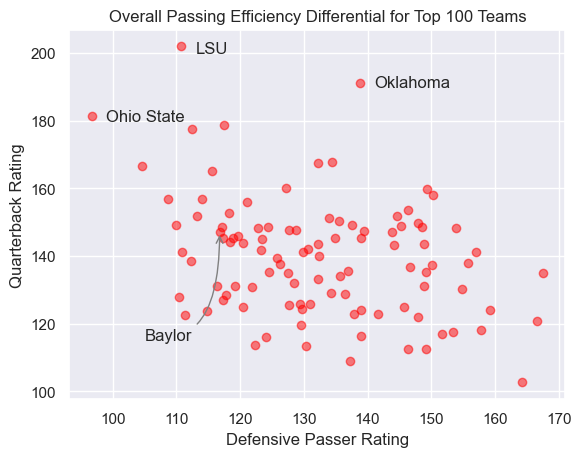

In [19]:
plt.figure()
plt.scatter(data_with_rating["DPR"], data_with_rating["QBR"], color = "red", alpha = 0.5, label = "Passing Efficiency Differential")

plt.xlabel("Defensive Passer Rating")
plt.ylabel("Quarterback Rating")
plt.title("Overall Passing Efficiency Differential for Top 100 Teams")

plt.annotate("LSU", xy = (110.65, 202.0), xytext = (113.0,200.0))
plt.annotate("Oklahoma", xy = (138.86, 191.2), xytext = (141.0, 190.0))
plt.annotate("Ohio State", xy = (96.74, 181.4), xytext = (99, 180))
plt.annotate("Baylor", xy = (116.79, 147.0), xytext = (105, 115), arrowprops=dict(arrowstyle="->", color = "grey", connectionstyle="angle3,angleA=0,angleB=-90"))

As can be seen, the data varies in terms of spread, as schools fall in the middle of the graph meaning their quarterback rating is decently high while their defense also performs well. An important data point to notice would be LSU, labeled in the top left. LSU has a high quarterback rating while also having a low defensive passer rating, suggesting a prolific offense, while having a strong defense as they were able to limit their opposition's quarterbacks. Another school that isn't as striking but certainly one to note, is Ohio State, which has the lowest defensive passer rating among all the schools in the list, possibly indicating success. Oklahoma also falls on this list with a high QBR but not as prominent of a defense, still a possible indicator of success. Upon further research, these three teams had immense success overall, achieving close to undefeated seasons as well. LSU ended its season being ranked #1 in the country, Ohio State #3, while Oklahoma dropped to #7 following a loss in the College Football Playoff. It is important to note that these three teams also made the 2020 College Playoffs. 

## Conclusion

With the data above, we were able to see the spread of different quarterbacks during the 2019 College Football Season. I found the conferences which had the most passing leaders and where in the distribution the quarterbacks lie relative to percentiles made around their passing yards. Using data visualization, I was able to see the overall passing efficiency differential for the top 100 schools by taking each team's QBR and calculating the defensive DPR using the defense dataset. In the future, I would like to use the data from quarterbacks in college to predict their success in the NFL if they were drafted. I also would like to use the offense and defensive dataset from a season and see if it could predict team success for the following year. Overall, this project was very interesting as this 2019 season got me interested in college football and the analytics side of sports. 

### Works Cited

- DPR Formula : https://en.wikipedia.org/wiki/Passer_rating
- Sports Reference: https://www.sports-reference.com/cfb/years/2019-passing.html
- AP Poll 2019: https://sportsdata.usatoday.com/football/ncaaf/ap-poll/2019-2020 